In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## Reglerentwurf mittels FKL-Verfahren

In dieser Aufgabe soll ein Reglerentwurf mittels FKL-Verfahren auf eine Strecke mit der Übertragungsfunktion

$$G(s) = \frac{9(1+\frac{5}{3}s)^2}{s(1+\frac{1}{50}s+s^2)}$$

angewandt werden, deren Bode-Diagramm unten dargestellt ist. Ziel des Reglerentwurfs ist, dass der geschlossene Kreis die nachfolgenden Anforderungen erfüllt.

Anforderungen an den geschlossenen Kreis:
- Der Ausgang  $y(t)$ des geschlossenen Kreises soll einem rampenförmigen Referenzsignal ohne bleibende Regelabweichung folgen können.
- Das Überschwingen des Ausgangssignals $y(t)$ bei der Aufschaltung eines sprungförmigen Referenzsignals $r(t)=\sigma(t)$ soll nicht mehr als $\ddot u=5\%$ betragen.
- Die Anstiegszeit des Ausgangssignals $y(t)$ bei der Aufschaltung eines sprungförmigen Referenzsignals soll in etwa $t_r=0.7s$ betragen.

Bode-Diagramm der Strecke  G(s):

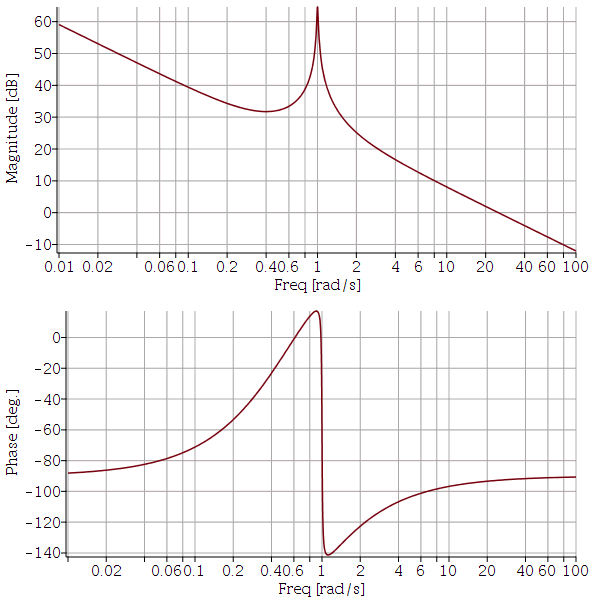

Entwerfen Sie nun gemäß FKL-Verfahren einen Regler, der die gewünschten Anforderungen erfüllt. Die Wahl der Reglerstruktur zum Erreichen dieser Anforderungen ist Ihnen überlassen.

### Lösung

Skriptum Seite 121 Kapitel 5

Skriptum Seite 125 Kapitel 5 --> Vorgangsweise

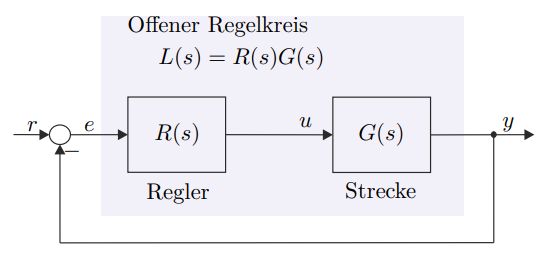

$R(s) - ?$

Offener Regelkreis: $L(s) = R(s)G(s)$

Geschlossener Regelkreis: $T(s) = \frac{L(s)}{1 + L(s)} = \frac{R(s)G(s)}{1+R(s)G(s)}$

1) Die Anstiegszeit tr hängt mit der Durchtrittsfrequenz $\omega_C$ über die Näherungsbeziehung: $\omega_C\cdot t_r = 1,5$

In [35]:
w_C = sp.symbols('w_C')
t_r = 0.7
w_C = 1.5/t_r
w_C

2.142857142857143

2) Das prozentuelle Überschwingen $\ddot u$ kann über die empirische Näherungsbeziehung: $$\Phi[\circ] + \ddot u[\%] = 70$$

In [37]:
Phi = sp.symbols('Phi') # Phasenreserve
u_e = 5
Phi = 70 - u_e
Phi

65

3) Die bleibende Regelabweichung $e_{\infty} =  \lim_{t\to\infty} e(t) =  \lim_{t\to\infty} (r(t)-y(t))$ soll 0 sein für ein rampenförmiges Referenzsignal

$r(t) = \sigma(t)$ und $\sigma(t) --> 1/s$, dann $\lim_{s\to 0} s\cdot \hat{e_r(s)}\cdot 1/s = 0$

#### Suchen R(s)

Der nächste Code ist irrelevant für die Aufgabe
##### Falshes Verfahren

$R(s) = \frac{z_{R}(s)}{n_{R}(s)}$

$T_{r,y}(s) = \frac{RG}{1+RG} = \frac{z_{G}z_{R}}{n_{R}n_{G}^{-}n_{G}^{+}+z_{G}z_{R}}$

Wir wollen natürlich die einfachste Übertragungsfunktion für $R(s)$ finden, die die Anforderungen erfüllt und dennoch realisierbar ist. Wir werden auch die Tatsache berücksichtigen, dass es ein Störsignal geben wird.

Parameter Entwurf mit Routh-Hurwitz-Verfahren:

$R(s) = \frac{a\cdot s + b}{s}$

$T_{r,y}(s) = \frac{(1+\frac{5}{3}s)^2(a\cdot s + b)}{s\cdot s(1+\frac{1}{50}s+s^2)+(1+\frac{5}{3}s)^2(a\cdot s + b)} $

$N(s) = s^2(1+\frac{1}{50}s+s^2)+(1+\frac{5}{3}s)^2(a\cdot s + b)$ muss Hurwitz-Polynom sein

$N(s) = s^4 + 0.02s^3+s^2+(1+\frac{10}{3}s+\frac{25}{9}s^2)(a\cdot s + b)$

$N(s) = s^4 + 0.02s^3+s^2+(a\cdot s + \frac{10}{3}s^2\cdot a + \frac{25}{9}s^3\cdot a + b + \frac{10}{3}sb+\frac{25}{9}s^2b)$

$N(s) = s^4 + s^3(0.02 + 25/9\cdot a)+s^2(1 + 10/3\cdot a + 25/9\cdot b)+s(a+10/3\cdot b) + b$

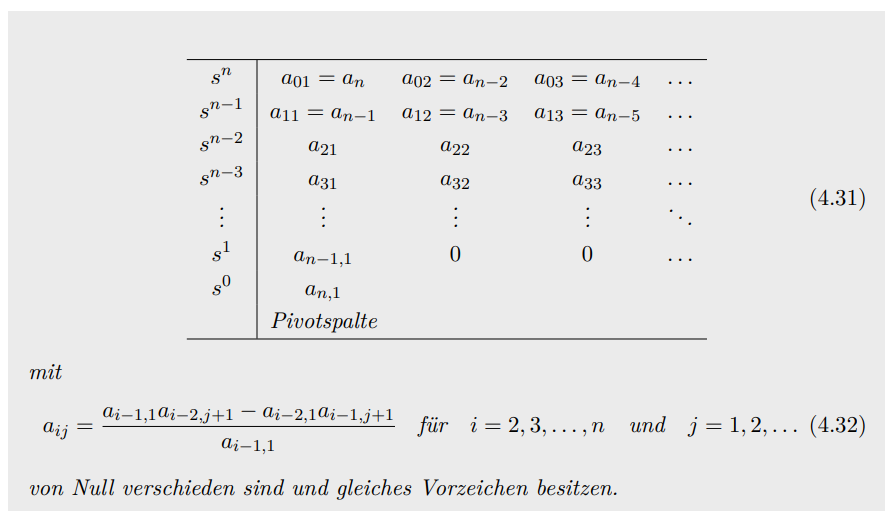

Skriptum Seite 111

In [141]:
s,a,b = sp.symbols('s a b')
from sympy import solve

def routh_table(coeffs):
    """
    Generate the Routh table for a given polynomial.

    Parameters:
    coeffs (list): Coefficients of the polynomial starting from the highest degree.

    Returns:
    list: The Routh table as a list of lists.
    """
    n = len(coeffs)  # number of coefficients (degree of polynomial + 1)
    cols = (n + 1) // 2  # number of columns in the Routh table
    routh = []

    # initialize the first two rows of the Routh table
    routh.append(coeffs[::2])  # even-index coefficients
    routh.append(coeffs[1::2])  # odd-index coefficients

    # pad the second row to match the number of columns
    while len(routh[1]) < len(routh[0]):
        routh[1].append(0)

    # fill the rest of the Routh table
    for i in range(2, n):
        routh.append([])  # add a new row
        for j in range(cols - 1):  # compute each element in the row
            # handle zero pivot element by substituting a small value
            pivot = routh[i - 1][0]
            if pivot == 0:
                pivot = 1e-9

            # calculate the element using the Routh-Hurwitz formula
            value = ((routh[i - 1][0] * routh[i - 2][j + 1]) -
                     (routh[i - 2][0] * routh[i - 1][j + 1])) / pivot
            routh[i].append(value)

        # handle special case: entire row becomes zero
        if all(el == 0 for el in routh[i]):
            deg = n - i  # degree of the auxiliary polynomial
            aux_poly = [(routh[i - 1][k] * (deg - 2 * k)) for k in range(len(routh[i - 1]))]
            routh[i] = aux_poly

        # pad the row to match the number of columns
        while len(routh[i]) < cols:
            routh[i].append(0)

    return routh


coeffs = [
        1, 
        0.02 + 25/9 * a, 
        1 + 10/3 * a + 25/9 * b, 
        a + 10/3 * b, 
        b
    ]

routh_table = routh_table(coeffs)
for i in routh_table:
    print(i)

[1, 3.33333333333333*a + 2.77777777777778*b + 1, b]
[2.77777777777778*a + 0.02, a + 3.33333333333333*b, 0]
[(-a - 3.33333333333333*b + (2.77777777777778*a + 0.02)*(3.33333333333333*a + 2.77777777777778*b + 1))/(2.77777777777778*a + 0.02), b, 0]
[(2.77777777777778*a + 0.02)*(-b*(2.77777777777778*a + 0.02) + (a + 3.33333333333333*b)*(-a - 3.33333333333333*b + (2.77777777777778*a + 0.02)*(3.33333333333333*a + 2.77777777777778*b + 1))/(2.77777777777778*a + 0.02))/(-a - 3.33333333333333*b + (2.77777777777778*a + 0.02)*(3.33333333333333*a + 2.77777777777778*b + 1)), 0, 0]
[b, 0, 0]


Hier gibt's viele Ungleichungen zu lösen. Probieren wir mal ein anderes Verfahren.

##### Richtiges Verfahren

In [258]:
s= sp.symbols('s')
G_s = 9*(1+5/3*s)**2/(s*(1+1/50*s+s**2))

$PI-Reglerentwurf$

In [261]:
print(f"t_r = {t_r}, u_e = {u_e}, w_C = {w_C}, Phi = {Phi}, e_inf = 0")

t_r = 0.7, u_e = 5, w_C = 2.142857142857143, Phi = 65, e_inf = 0


Der offene Kreis muss mindestens eine einfache Polstelle bei s = 0 haben.

Wenn bleibende Regelabweichung einer Sprungfunktion = 0, dann 1/s

Wenn bleibende Regelabweichung einer Rampenfunktion = 0, dann 1/s^2

In [264]:
V_I, T_I = sp.symbols('V_I T_I')
# Als Regler wird ein PI-Regler der Form
R_s =V_I*(1+s*T_I)/s

Im ersten Schritt wird das Bode-Diagramm aller bekannten Terme des offenen Kreises L(s) = R(s)G(s), also

In [267]:
L_1_s = G_s * 1/s

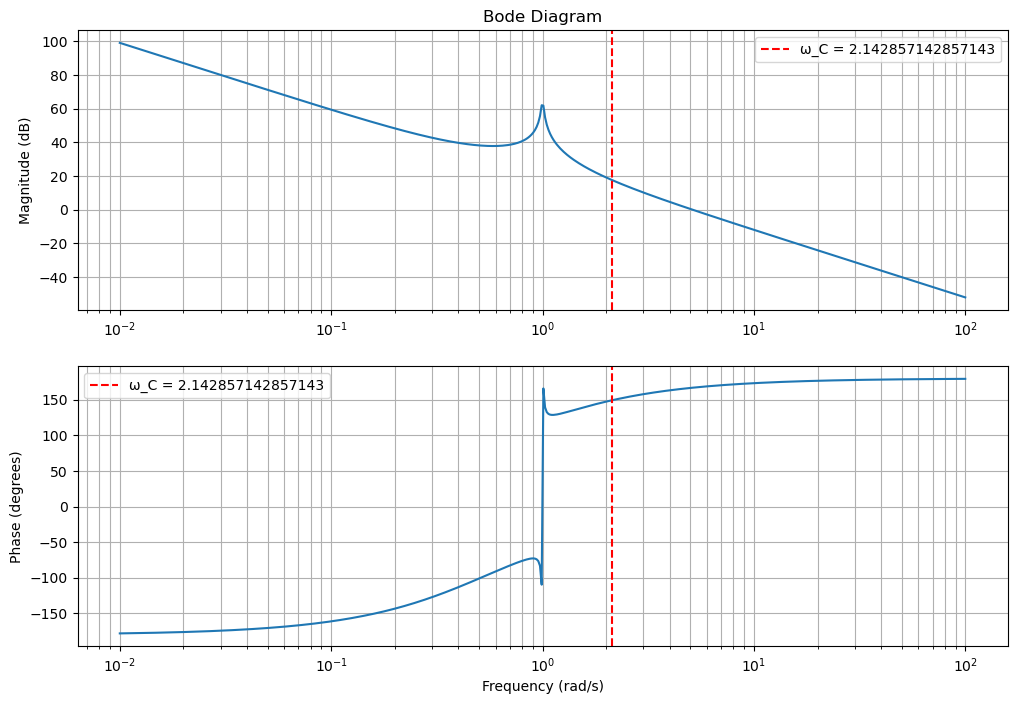

In [269]:
R_s = V_I * (1 + s * T_I) / s
L_1_s = G_s * R_s

L_1_s_func = sp.lambdify(s, L_1_s.subs({V_I: 1, T_I: 0}), 'numpy')

# Define the frequency range for the Bode plot
frequencies = np.logspace(-2, 2, 500)
s_values = 1j * frequencies

# Calculate magnitude and phase
magnitude = 20 * np.log10(np.abs(L_1_s_func(s_values)))
phase = np.angle(L_1_s_func(s_values), deg=True)

# Plotting the Bode diagram
plt.figure(figsize=(12, 8))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(frequencies, magnitude)
plt.axvline(w_C, color='red', linestyle='--', label=f'ω_C = {w_C}')
plt.title('Bode Diagram')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(which='both', axis='both')

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(frequencies, phase)
plt.axvline(w_C, color='red', linestyle='--', label=f'ω_C = {w_C}')
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Phase (degrees)')
plt.legend()
plt.grid(which='both', axis='both')

plt.show()


Kann nicht die Phase kompensieren.